# TB Diabetes

# Dataset Description
1. Total Rows: 700
2. Total Columns: 19
# Dataset Context:
The dataset contains information on Tuberculosis (TB) and Diabetes (DM) cases across different states/UTs in India. 
It focuses on the number of diagnosed patients, testing statistics, and treatment initiation rates.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1.Load the dataset

In [2]:
file_path = "Expanded_Diabetes.csv"
df = pd.read_csv(file_path)


# 2.Print available columns to verify correct names

In [3]:
print("Available Columns:")
print(df.columns)


Available Columns:
Index(['State/Uts',
       'No of TB - Diabetes-TB patients with known DM status, of notified)-Public',
       'Percentage  of TB - Diabetes-TB patients with known DM status,of notified)-Public',
       'No of TB - Diabetes-TB patients with known DM status, of notified)-Private',
       'Percentage  of TB - Diabetes-TB patients with known DM status, of notified)-Private',
       'No of TB - Diabetes-TB patients with known DM status,of notified)-Total',
       'Percentage of TB - Diabetes-TB patients with known DM status,  of notified)-Total',
       'No of TB - Diabetes-Patients diagnosed among tested,of those with known DM status)-Public',
       'Percentage of TB - Diabetes- Patients diagnosed among tested,of those with known DM status)-Public',
       'No of TB - Diabetes- Patients diagnosed among tested, of those with known DM status)-Private',
       'Percentage  of TB - Diabetes-Patients diagnosed among tested,  of those with known DM status)-Private',
       '

# 3.Rename columns only if they exist

In [4]:
column_rename_map = {
    "State/Uts": "State",
    "No of TB - Diabetes-TB patients with known DM status, of notified)-Public": "TB_DM_Public",
    "No of TB - Diabetes-TB patients with known DM status, of notified)-Private": "TB_DM_Private",
    "No of TB - Diabetes-TB patients with known DM status,of notified)-Total": "TB_DM_Total",
    "No of TB - Diabetes- patients initiated on Anti-diabetic treatment, of TB-DM)-Total": "TB_DM_Treatment_Total"
}
df.rename(columns={k: v for k, v in column_rename_map.items() if k in df.columns}, inplace=True)

# 4.Fill missing values with 0

In [5]:
df.fillna(0, inplace=True)


# 5.Feature Engineering

In [6]:
if 'TB_DM_Total' in df.columns:
    df['Diabetes_Case_Rate_%'] = (df['TB_DM_Total'] / df['TB_DM_Total'].sum()) * 100
    if 'TB_DM_Treatment_Total' in df.columns:
        df['Treatment_Initiation_Rate_%'] = (df['TB_DM_Treatment_Total'] / df['TB_DM_Total']) * 100
    else:
        print("Warning: 'TB_DM_Treatment_Total' column not found, skipping treatment rate calculation.")
else:
    print("Warning: 'TB_DM_Total' column not found, skipping derived calculations.")



# 6.Display basic information

In [7]:
def basic_info(df):
    print("Basic Info:")
    print(df.info())
    print("\nStatistical Summary:")
    print(df.describe())

# 7.Check for missing values

In [8]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])

# 8.Correlation Analysis


In [9]:
def correlation_analysis(df):
    numeric_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(12, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()


# 9.Top 5 states with highest TB-Diabetes cases

In [10]:
def top_states(df, column):
    if column in df.columns:
        top_states = df[['State', column]].nlargest(5, column)
        print(f"\nTop 5 States for {column}:")
        print(top_states)
    else:
        print(f"Warning: Column '{column}' not found in dataset.")

# 10.Accuracy Check

In [11]:
def accuracy_check(df):
    if {'TB_DM_Public', 'TB_DM_Private', 'TB_DM_Total'}.issubset(df.columns):
        df['Computed_Total'] = df['TB_DM_Public'] + df['TB_DM_Private']
        df['Discrepancy'] = df['Computed_Total'] - df['TB_DM_Total']
        discrepancies = df[df['Discrepancy'] != 0]
        print("\nData Accuracy Check: Public + Private should equal Total")
        if discrepancies.empty:
            print("All records are consistent.")
        else:
            print("Inconsistencies found in the following records:")
            print(discrepancies[['State', 'Computed_Total', 'TB_DM_Total', 'Discrepancy']])
    else:
        print("Warning: Required columns for accuracy check not found.")


# 11.Run functions

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 20 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   State                                                                                                  700 non-null    object 
 1   TB_DM_Public                                                                                           700 non-null    float64
 2   Percentage  of TB - Diabetes-TB patients with known DM status,of notified)-Public                      700 non-null    float64
 3   TB_DM_Private                                                                                          700 non-null    float64
 4   Percentage  of TB - Diabetes-TB patients with known DM status, of notified)-Private   

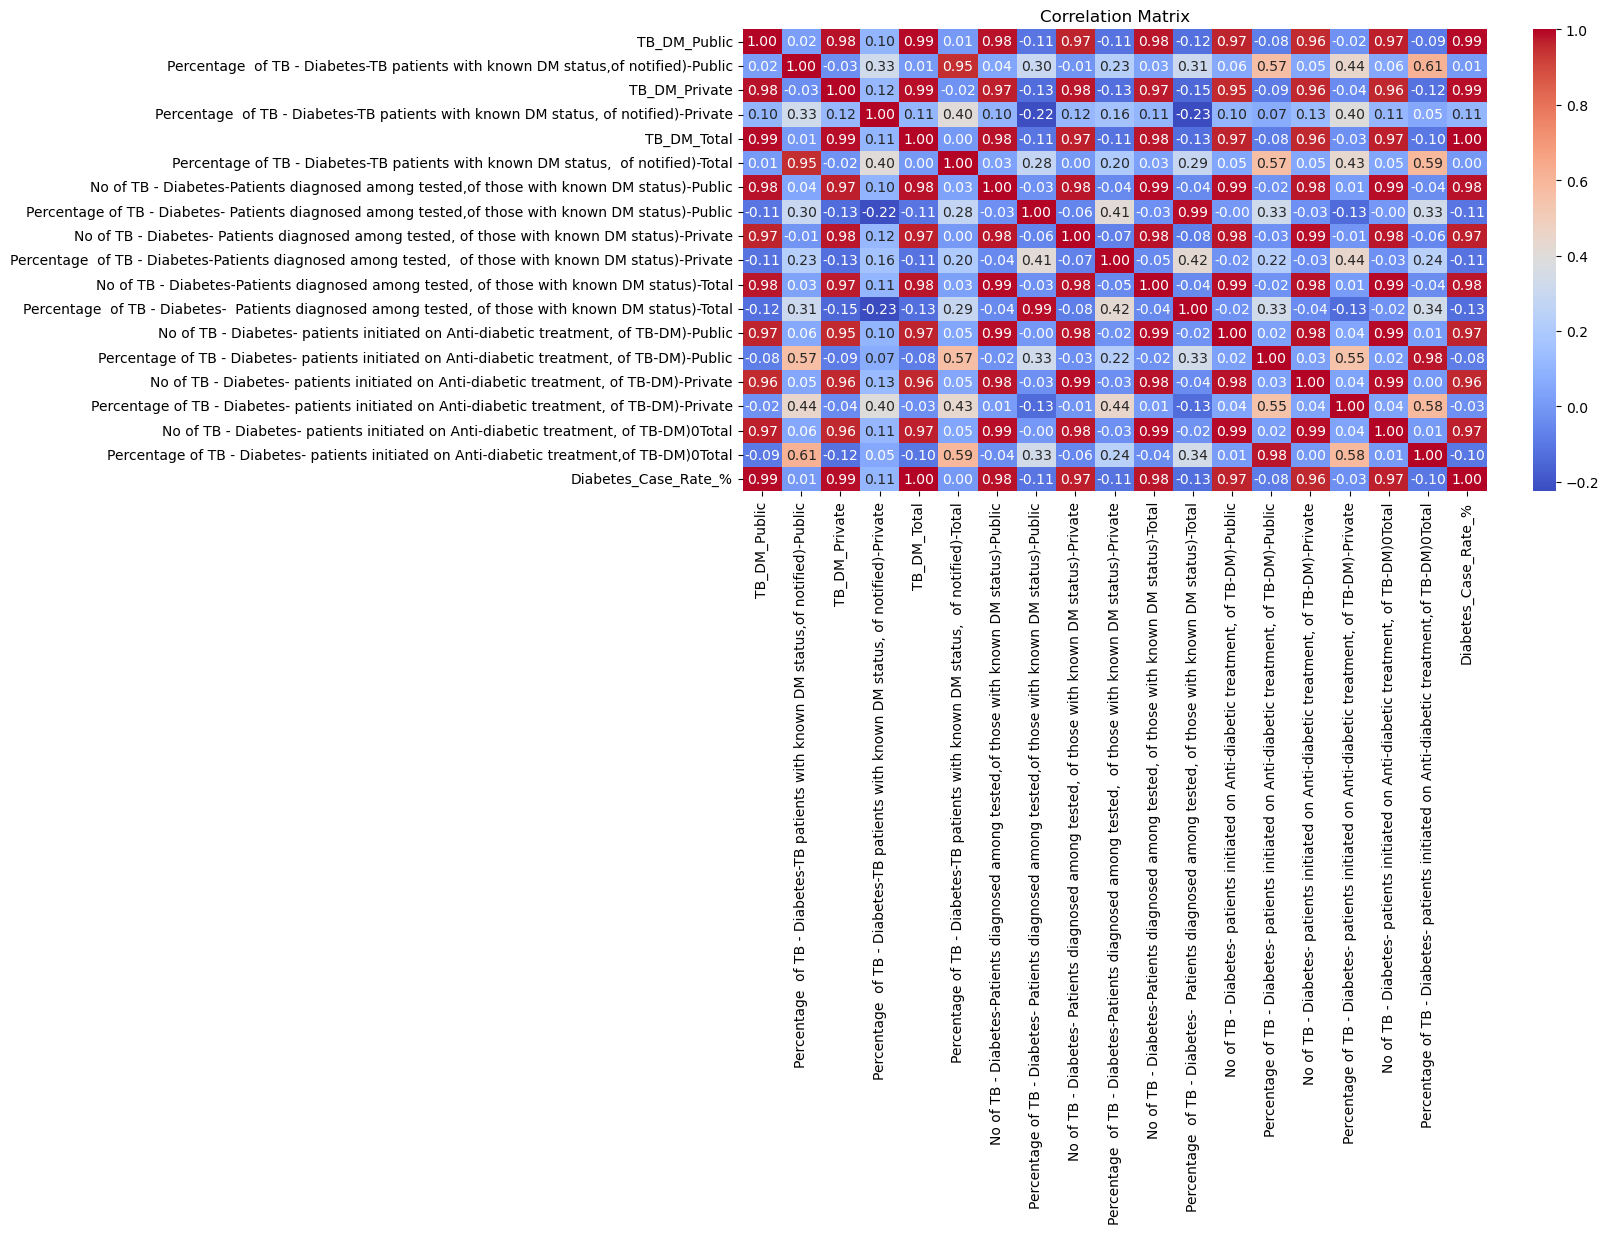


Top 5 States for TB_DM_Total:
     State  TB_DM_Total
36   India    2215930.0
169  India    2215930.0
245  India    2215930.0
264  India    2215930.0
372  India    2215930.0

Data Accuracy Check: Public + Private should equal Total
Inconsistencies found in the following records:
                         State  Computed_Total    TB_DM_Total   Discrepancy
37            Himachal Pradesh    10094.348823   33455.637461 -23361.288638
38                   Karnataka    67459.744036  136693.222233 -69233.478197
39                     Manipur       23.000000   11514.901772 -11491.901772
40                       Bihar   135978.564724   91853.501721  44125.063003
41   Andaman & Nicobar Islands      374.585523      21.000000    353.585523
..                         ...             ...            ...           ...
695                Lakshadweep       21.000000   11329.759583 -11308.759583
696                 Chandigarh    44514.938433   14917.719497  29597.218936
697            Jammu & Kashmir     

In [12]:
basic_info(df)
check_missing_values(df)
correlation_analysis(df)
top_states(df, 'TB_DM_Total')
accuracy_check(df)

# 12.Sample DataFrame (Replace this with actual data loading step)

In [13]:
data = {
    "State/Uts": ["State A", "State B", "State C", "State D", "State E", "State F", "State G"],
    "TB-Diabetes Patients": [500, 700, 400, 600, 300, 800, 450],
    "Treatment Initiation Rate": [90, 85, 75, 80, 95, 70, 88]
}
df = pd.DataFrame(data)


#  13.Top 5 States with Highest TB-Diabetes Cases

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states["State/Uts"], y=top_states["TB-Diabetes Patients"], palette="Blues_r")
plt.xlabel("State/UTs")
plt.ylabel("No. of TB-Diabetes Patients")
plt.title("Top 5 States with Highest TB-Diabetes Cases")
plt.xticks(rotation=45)
plt.show()


TypeError: 'function' object is not subscriptable

<Figure size 1000x500 with 0 Axes>

# 14.Display heatmap

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of TB-Diabetes Data")
plt.show()

# 15.Display scatter plot

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["TB-Diabetes Patients"], y=df["Treatment Initiation Rate"], hue=df["State/Uts"], palette="Dark2", s=100)
plt.xlabel("TB-Diabetes Patients")
plt.ylabel("Treatment Initiation Rate (%)")
plt.title("Scatter Plot of TB-Diabetes Patients vs Treatment Initiation Rate")
plt.show()

# 16.Display line plot

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df["State/Uts"], y=df["Treatment Initiation Rate"], marker="o", linestyle="-", color="b")
plt.xlabel("State/UTs")
plt.ylabel("Treatment Initiation Rate (%)")
plt.title("Treatment Initiation Rate Across States")
plt.xticks(rotation=45)
plt.show()

# 17.Top States with Highest TB-Diabetes Patients

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["State/Uts"], y=df["TB-Diabetes Patients"], palette="viridis")
plt.title("Top States with Highest TB-Diabetes Cases")
plt.xlabel("State/Uts")
plt.ylabel("Number of TB-Diabetes Patients")
plt.xticks(rotation=45)
plt.show()

 # 18.Pie Chart – Distribution of TB-Diabetes Cases Across States

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df["TB-Diabetes Patients"], labels=df["State/Uts"], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Distribution of TB-Diabetes Cases Across States")
plt.show()


# 19.Box Plot – Treatment Initiation Rate Distribution

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Treatment Initiation Rate"], color="skyblue")
plt.title("Distribution of Treatment Initiation Rate")
plt.ylabel("Treatment Initiation Rate (%)")
plt.show()


# 20.Histogram – Frequency of TB-Diabetes Patient Counts

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["TB-Diabetes Patients"], bins=5, color="purple", edgecolor="black")
plt.title("Distribution of TB-Diabetes Patients")
plt.xlabel("Number of TB-Diabetes Patients")
plt.ylabel("Frequency")
plt.show()


# 21.Scatter Plot – TB-Diabetes Patients vs. Treatment Initiation Rate

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["TB-Diabetes Patients"], y=df["Treatment Initiation Rate"], color="red", s=100)
plt.title("TB-Diabetes Patients vs. Treatment Initiation Rate")
plt.xlabel("TB-Diabetes Patients")
plt.ylabel("Treatment Initiation Rate (%)")
plt.grid()
plt.show()


# 22.Bar Chart – Patients per State (Sorted)

In [ ]:
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values(by="TB-Diabetes Patients", ascending=False)
sns.barplot(x=df_sorted["State/Uts"], y=df_sorted["TB-Diabetes Patients"], palette="coolwarm")
plt.title("TB-Diabetes Cases per State (Sorted)")
plt.xlabel("State/Uts")
plt.ylabel("TB-Diabetes Patients")
plt.xticks(rotation=45)
plt.show()


# 23.Horizontal Bar Chart – Treatment Initiation Rate by State

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(y=df["State/Uts"], x=df["Treatment Initiation Rate"], palette="magma")
plt.title("Treatment Initiation Rate by State")
plt.xlabel("Treatment Initiation Rate (%)")
plt.ylabel("State/Uts")
plt.show()


# 24.Heatmap – Correlation Between Features

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.drop(columns=["State/Uts"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 25.Pair Plot – Relationship Between Features

In [ ]:
sns.pairplot(df.drop(columns=["State/Uts"]), diag_kind="kde")
plt.show()


# 26.Swarm Plot – TB-Diabetes Patients per State


In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df["State/Uts"], y=df["TB-Diabetes Patients"], color="blue")
plt.title("Swarm Plot of TB-Diabetes Patients per State")
plt.xlabel("State/Uts")
plt.ylabel("TB-Diabetes Patients")
plt.xticks(rotation=45)
plt.show()


# 27.Reg Plot – TB-Diabetes Patients vs. Treatment Initiation Rate

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df["TB-Diabetes Patients"], y=df["Treatment Initiation Rate"], scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Regression Plot: TB-Diabetes Cases vs. Treatment Initiation Rate")
plt.xlabel("TB-Diabetes Patients")
plt.ylabel("Treatment Initiation Rate (%)")
plt.show()


# 28.Stacked Bar Chart – Comparing Two Variables

In [ ]:
df.plot(kind="bar", x="State/Uts", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Stacked Bar Chart of TB-Diabetes Cases and Treatment Initiation Rate")
plt.xlabel("State/Uts")
plt.ylabel("Count / Rate")
plt.xticks(rotation=45)
plt.legend(["TB-Diabetes Patients", "Treatment Initiation Rate"])
plt.show()


# 29.Bubble Chart – Impact of TB-Diabetes Cases

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["TB-Diabetes Patients"], y=df["Treatment Initiation Rate"], size=df["TB-Diabetes Patients"], sizes=(50, 500), alpha=0.6)
plt.title("Bubble Chart: TB-Diabetes Patients vs. Treatment Initiation Rate")
plt.xlabel("TB-Diabetes Patients")
plt.ylabel("Treatment Initiation Rate (%)")
plt.grid()
plt.show()


# 30.Line Plot – Trend of TB-Diabetes Patients Across States

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["State/Uts"], y=df["TB-Diabetes Patients"], marker="o", color="blue", linewidth=2)
plt.title("Trend of TB-Diabetes Patients Across States")
plt.xlabel("State/Uts")
plt.ylabel("TB-Diabetes Patients")
plt.xticks(rotation=45)
plt.grid()
plt.show()


# 31.KDE Plot – Density Distribution of TB-Diabetes Patients

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["TB-Diabetes Patients"], shade=True, color="green")
plt.title("Density Distribution of TB-Diabetes Patients")
plt.xlabel("TB-Diabetes Patients")
plt.ylabel("Density")
plt.grid()
plt.show()


# 32.Histogram – Distribution of TB-Diabetes Cases

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df["TB-Diabetes Patients"], bins=5, kde=True, color="purple")
plt.title("Distribution of TB-Diabetes Cases")
plt.xlabel("Number of TB-Diabetes Patients")
plt.ylabel("Frequency")
plt.show()


# Observation on the Dataset:

1. The data underscore substantial differences between public and private health care facilities in the detection and treatment of TB-diabetes co-infection.
2. Public health facilities record a considerably larger number of cases, which could be due to more effective screening programs and systematic recording.
3. The private sector, however, has variability in reporting, especially in the recording of the initiation of treatment, which could reflect reporting shortcomings or restrictions in health care accessibility.